In [1]:
import pandas as pd
from datetime import datetime
import pylab as plt
import numpy as np
import glob
import os
import sys
import matplotlib

### Import data

In [11]:
data_path = r"/home/znjs2/input_data/atom_data_02_20/processed/all_atom_co_data_datetime.csv"
var_name = 'CO'
var_lab = 'co'

In [7]:
'''#for checking headers and reading in specific columns
nasa_headers = pd.read_csv(data_path, delimiter=',', 
                        na_values = [-99999, -9999, -999, -888], 
                        parse_dates=[0], 
                        index_col=0, nrows=2)
#print(nasa_headers)

#ch4_data = nasa_data.iloc[:,[0,11,12,13,181,182]]
ch4_data = pd.read_csv(data_path, delimiter=',', 
                        na_values = [-99999, -9999, -999, -888], 
                        parse_dates=[0], 
                        index_col=0, usecols = [0,11,12,13,181,182])
#print(ch4_data[:5])'''

"#for checking headers and reading in specific columns\nnasa_headers = pd.read_csv(data_path, delimiter=',', \n                        na_values = [-99999, -9999, -999, -888], \n                        parse_dates=[0], \n                        index_col=0, nrows=2)\n#print(nasa_headers)\n\n#ch4_data = nasa_data.iloc[:,[0,11,12,13,181,182]]\nch4_data = pd.read_csv(data_path, delimiter=',', \n                        na_values = [-99999, -9999, -999, -888], \n                        parse_dates=[0], \n                        index_col=0, usecols = [0,11,12,13,181,182])\n#print(ch4_data[:5])"

In [8]:
ch4_data = pd.read_csv(data_path, delimiter=',', 
                        na_values = [-99999, -9999, -999, -888], 
                        parse_dates=[0], 
                        index_col=0)

print(ch4_data.iloc[:3])

                        G_LAT     G_LONG  G_ALT  CO_PECD  COe_PECD
UTC_Start_dt                                                      
2017-10-27 18:24:34  61.17635 -150.00177  143.0      NaN       NaN
2017-10-27 18:24:35  61.17567 -150.00139  154.1      NaN       NaN
2017-10-27 18:24:36  61.17499 -150.00101  165.9      NaN       NaN


Text(0.5, 1.0, 'CH4 Profile')

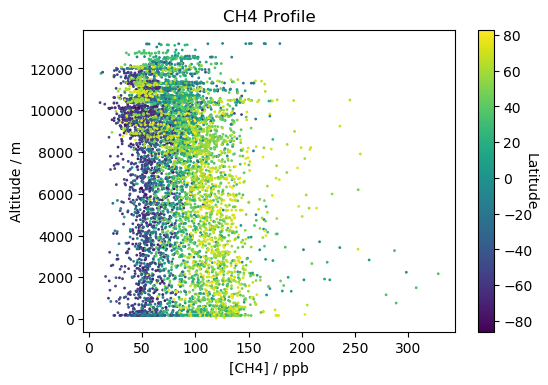

In [10]:
fig = plt.figure(dpi=100)
ax = plt.axes()
plot = ax.scatter(ch4_data.iloc[:,3],ch4_data.iloc[:,2],s=1, c=ch4_data.iloc[:,0])

cbar = plt.colorbar(plot)
cbar.set_label('Latitude', rotation=270)
#ax.set_xlim(1600,2000)
plt.xlabel('[CH4] / ppb')
plt.ylabel('Altitude / m')
plt.title(f'CH4 Profile')

### Bin by latitude

In [14]:
ch4_data['lat_bins'] = pd.cut(ch4_data.iloc[:,0],[-90,-60,-30,0,30,60,90], 
                              labels=list(range(6)))
#labels=["-90_-60","-60--30","-30-0","0-30","30-60","60-90"]

In [15]:
print(ch4_data.columns.values)

['G_LAT' 'G_LONG' 'G_ALT' 'CO_PECD' 'COe_PECD' 'lat_bins']


Text(0.5, 1.0, 'CH4 Profile')

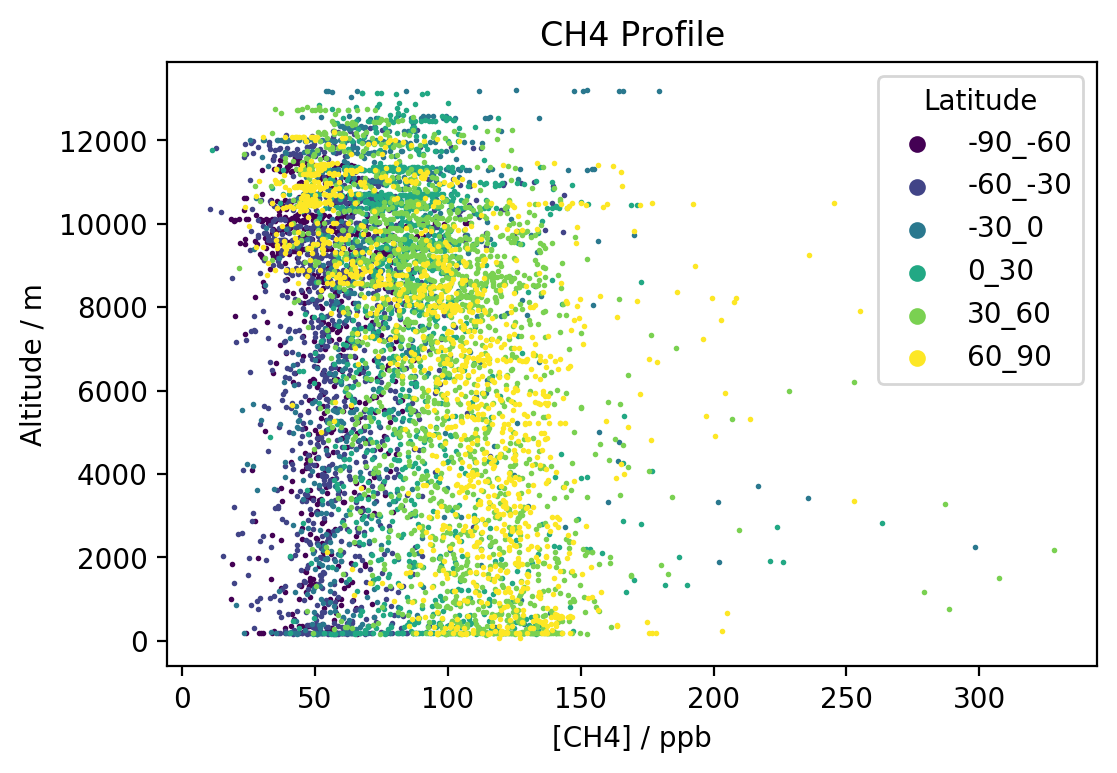

In [31]:
fig = plt.figure(dpi=200)
ax = plt.axes()

labels=["-90_-60","-60_-30","-30_0","0_30","30_60","60_90"]
cmap = matplotlib.cm.get_cmap('viridis')

for i in range(6):
    lat_band = ch4_data.loc[ch4_data['lat_bins'] == i]
    ax.scatter(lat_band.iloc[:,3],lat_band.iloc[:,2],s=1,c=[cmap(i/5)],label=f'{labels[i]}')

#ax.set_xlim(1600,2000) #for ch4
plt.legend(title='Latitude', markerscale=5)
plt.xlabel('[CH4] / ppb')
plt.ylabel('Altitude / m')
plt.title(f'CH4 Profile')

### Fit curve to each lat band dataset

In [30]:
lat_bands_obs = np.empty((6,50))
base_obs = np.zeros(6)

yvals = np.linspace(0,12000)

for i in range(6):
    #select data by latitude band
    lat_band = ch4_data.loc[ch4_data['lat_bins'] == i].iloc[:,[0,2,3]].dropna()
    #generate coefficients and make function
    coefs = np.polyfit(lat_band.iloc[:,1],lat_band.iloc[:,2],3)
    fit = np.poly1d(coefs)
    base_obs[i] = fit(0) #set zero value
    lat_bands_obs[i] = fit(yvals)

np.save(f'/home/znjs2/input_data/atom_data_02_20/{var_lab}_lat_binned.npy', lat_bands_obs)

(6, 50)


Text(0.5, 1.0, 'CO Profile: ATom data PECD')

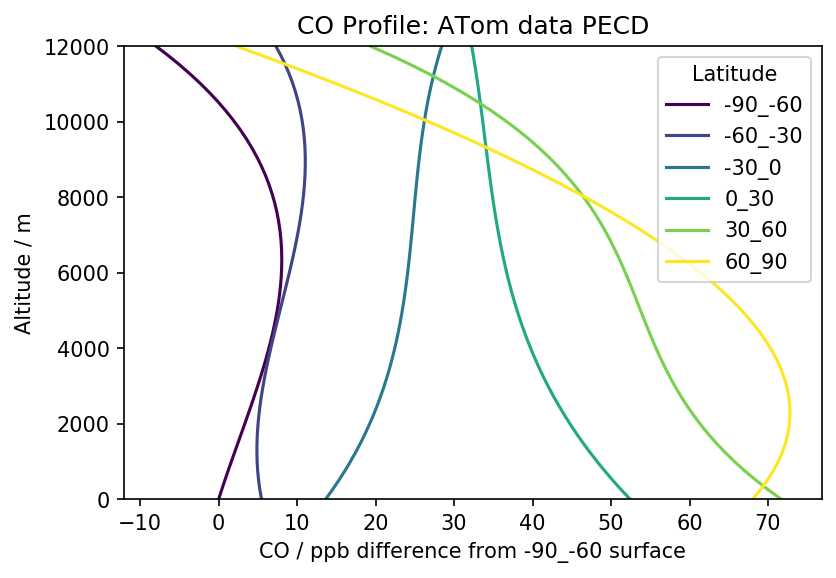

In [29]:
#plot normalised to -90 value
fig = plt.figure(dpi=150)
ax = plt.axes()

yvals = np.linspace(0,12000)
labels=["-90_-60","-60_-30","-30_0","0_30","30_60","60_90"]
cmap = matplotlib.cm.get_cmap('viridis')


for i in range(6):
    ax.plot(lat_bands_obs[i,:]-base_obs[0],yvals, c=cmap(i/5),label=f'{labels[i]}')

#ax.set_xlim(-250,250)
ax.set_ylim(0,12000)

plt.legend(title='Latitude', markerscale=5)
plt.xlabel(f'{var_name} / ppb difference from -90_-60 surface')
plt.ylabel('Altitude / m')
plt.title(f'{var_name} Profile: ATom data PECD')

Text(0.5, 1.0, 'CO Profile: ATom data PECD')

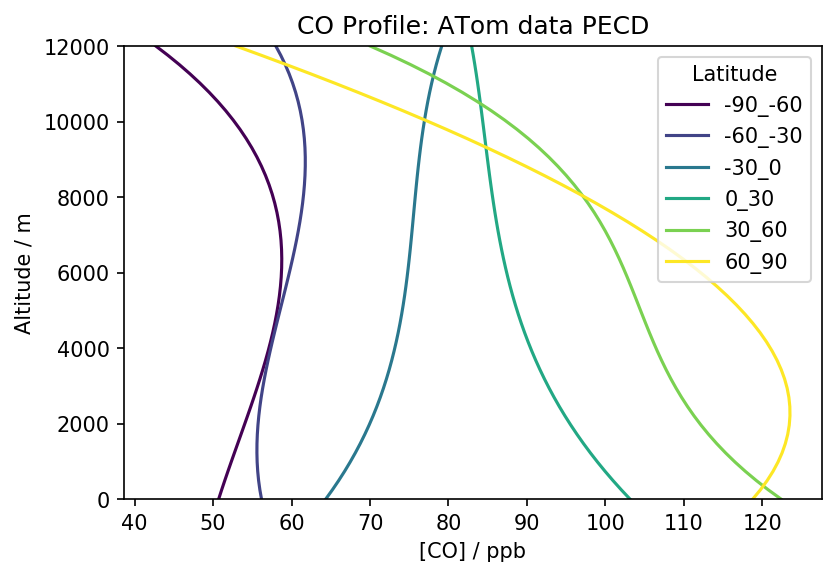

In [27]:
#plot absolute concss
fig = plt.figure(dpi=150)
ax = plt.axes()

yvals = np.linspace(0,12000)
labels=["-90_-60","-60_-30","-30_0","0_30","30_60","60_90"]
cmap = matplotlib.cm.get_cmap('viridis')

base=np.zeros(6)

for i in range(6):
    ax.plot(lat_bands_obs[i,:],yvals, c=cmap(i/5),label=f'{labels[i]}')

#ax.set_xlim(-250,250)
ax.set_ylim(0,12000)

plt.legend(title='Latitude', markerscale=5)
plt.xlabel(f'[{var_name}] / ppb')
plt.ylabel('Altitude / m')
plt.title(f'{var_name} Profile: ATom data PECD')

### Extra plots

Text(0.5, 1.0, 'CH4 Profile: ATom data PECD')

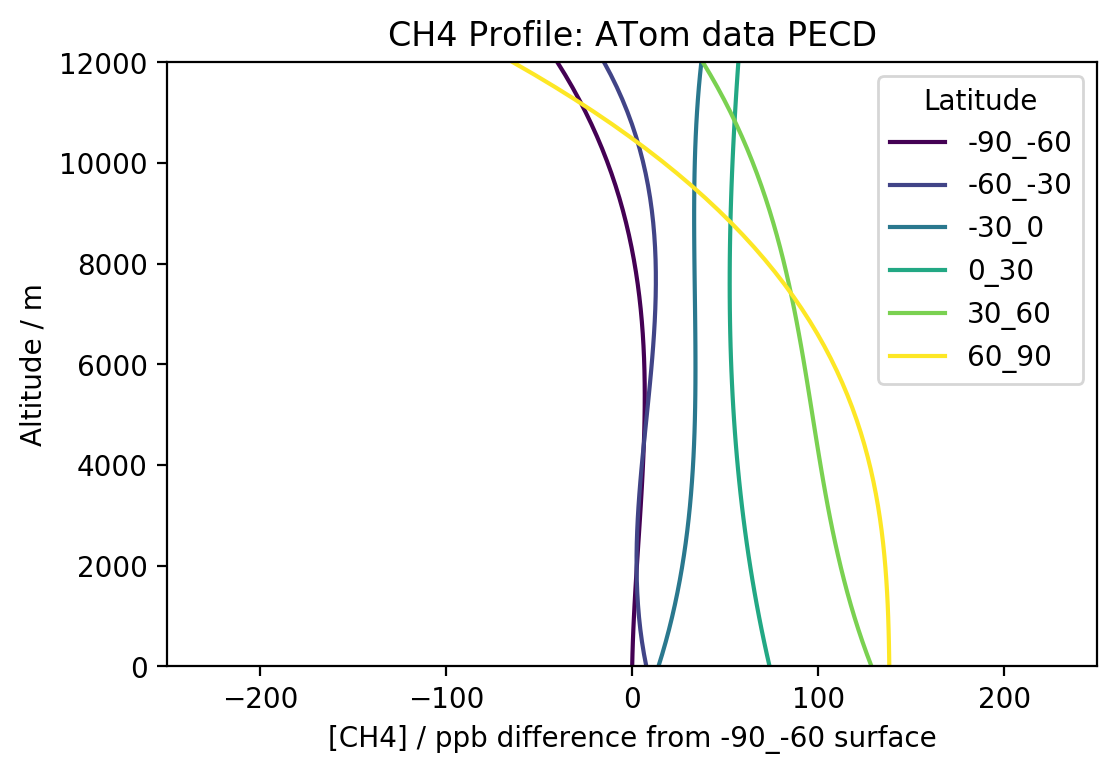

In [20]:
fig = plt.figure(dpi=200)
ax = plt.axes()

yvals = np.linspace(0,12000)
labels=["-90_-60","-60_-30","-30_0","0_30","30_60","60_90"]
cmap = matplotlib.cm.get_cmap('viridis')

base=np.zeros(6)

for i in range(6):
    #select data by latitude band
    lat_band = ch4_data.loc[ch4_data['lat_bins'] == i].iloc[:,[0,2,3]].dropna()
    #generate coefficients and make function
    coefs = np.polyfit(lat_band.iloc[:,1],lat_band.iloc[:,2],3)
    fit = np.poly1d(coefs)
    base[i] = fit(0) #set zero value
    ax.plot(fit(yvals)-base[0],yvals, c=cmap(i/5),label=f'{labels[i]}')

ax.set_xlim(-250,250)
ax.set_ylim(0,12000)

plt.legend(title='Latitude', markerscale=5)
plt.xlabel('[CH4] / ppb difference from -90_-60 surface')
plt.ylabel('Altitude / m')
plt.title(f'CH4 Profile: ATom data PECD')